# Project Three --- Boston Crime

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

crimes = pd.read_csv('crime.csv')
crimes

ModuleNotFoundError: No module named 'descartes'

In [7]:
# import pandas_profiling
# profile = crimes.profile_report(title='Boston Crimes Profiling')
# profile.to_file(output_file='boston-crimes-profiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Cleaning the Data

#### Turning the date column into the datetime datatype

In [31]:
crimes['OCCURRED_ON_DATE'] = pd.to_datetime(crimes["OCCURRED_ON_DATE"])

#### Turning the SHOOTING column into a boolean (where NaN = False and Y = True)

https://statisticsglobe.com/replace-values-in-pandas-dataframe-python

In [32]:
crimes['SHOOTING'] = crimes['SHOOTING'].fillna(False)
crimes['SHOOTING'] = crimes['SHOOTING'].replace("Y", True)
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,False,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,False,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,False,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,False,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,False,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,False,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,False,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


(checking to make sure it is true and false)

In [42]:
crimes.SHOOTING.value_counts()

False    318054
True       1019
Name: SHOOTING, dtype: int64

(checking to make sure we have the right data types (and we do!)

In [34]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319073 non-null  object        
 1   OFFENSE_CODE         319073 non-null  int64         
 2   OFFENSE_CODE_GROUP   319073 non-null  object        
 3   OFFENSE_DESCRIPTION  319073 non-null  object        
 4   DISTRICT             317308 non-null  object        
 5   REPORTING_AREA       298823 non-null  float64       
 6   SHOOTING             319073 non-null  bool          
 7   OCCURRED_ON_DATE     319073 non-null  datetime64[ns]
 8   YEAR                 319073 non-null  int64         
 9   MONTH                319073 non-null  int64         
 10  DAY_OF_WEEK          319073 non-null  object        
 11  HOUR                 319073 non-null  int64         
 12  UCR_PART             318983 non-null  object        
 13  STREET        

### Basic Questions

#### What are the range of dates being recorded?

In [35]:
crimes.OCCURRED_ON_DATE.sort_values(ascending=True).agg([max, min])

max   2018-09-03 21:25:00
min   2015-06-15 00:00:00
Name: OCCURRED_ON_DATE, dtype: datetime64[ns]

#### What are all the unique groups of offense codes and which are most prevalent in the data?

In [43]:
offense_code_groups = crimes.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=False)

TOP 10 offense code groups

In [44]:
offense_code_groups.head(10)

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, dtype: int64

BOTTOM 10 offense code groups

In [45]:
offense_code_groups.tail(10)

Aircraft                                     36
Phone Call Complaints                        31
Explosives                                   27
Manslaughter                                  8
Gambling                                      8
HUMAN TRAFFICKING                             7
INVESTIGATE PERSON                            4
Biological Threat                             2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Burglary - No Property Taken                  2
Name: OFFENSE_CODE_GROUP, dtype: int64

### Questions

#### What percentage of murders involved a shooting? (Look at Murder, non-negligent manslaughter (offense_code 111))

https://www.w3schools.com/python/matplotlib_pie_charts.asp, https://www.tutorialspoint.com/how-to-get-the-index-and-values-of-series-in-pandas

In [57]:
murders = crimes.loc[crimes.OFFENSE_CODE == 111].groupby('SHOOTING').SHOOTING.count()
murders

SHOOTING
False     40
True     121
Name: SHOOTING, dtype: int64

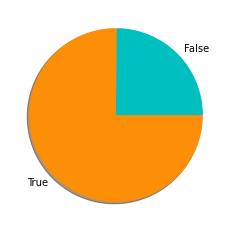

In [67]:
plt.pie(murders, labels=murders.index, shadow=True, colors = ['c', '#fd8e08'])
plt.show()

#### Are there certain times of the year when crime is more prevalent in Boston?

(adding a new column in the original dataframe (crimes) with the name of every months)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month_name.html

In [74]:
# crimes['MONTH_NAME'] = crimes.OCCURRED_ON_DATE.dt.month_name()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html, https://stackoverflow.com/questions/48042915/sort-a-pandas-dataframe-series-by-month-name

In [95]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

https://www.geeksforgeeks.org/python-change-column-names-and-row-indexes-in-pandas-dataframe/

In [167]:
crime_by_month = crimes.loc[crimes.YEAR == 2016].groupby('MONTH').MONTH.count().to_frame()
crime_by_month.columns = ['2016']
crime_by_month['2015'] = crimes.loc[crimes.YEAR == 2015].groupby('MONTH').MONTH.count()
crime_by_month['2017'] = crimes.loc[crimes.YEAR == 2017].groupby('MONTH').MONTH.count()
crime_by_month['2018'] = crimes.loc[crimes.YEAR == 2018].groupby('MONTH').MONTH.count().drop(9)
crime_by_month['Yearly Average'] = crime_by_month.mean(axis=1)
crime_by_month

,2016,2015,2017,2018,Yearly Average
MONTH,,,,,
1,7835,NaN,7993,7782.0,7870.000000
2,7308,NaN,7408,6937.0,7217.666667
3,8199,NaN,8179,7768.0,8048.666667
4,8101,NaN,8069,7916.0,8028.666667
5,8578,NaN,8715,8906.0,8733.000000
6,8558,4191.0,8985,8834.0,7642.000000
7,8619,8324.0,9075,8538.0,8639.000000
8,8938,8342.0,9206,8337.0,8705.750000
9,8522,8414.0,8940,NaN,8625.333333


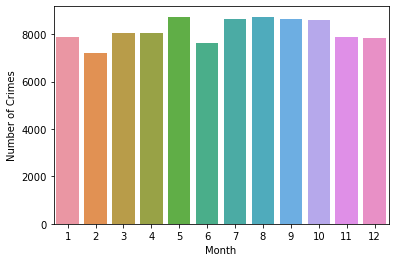

In [168]:
ax=plt.subplots()

ax=sns.barplot(x=crime_by_month.index, y=crime_by_month['Yearly Average'])

ax.set(xlabel='Month', ylabel='Number of Crimes')

plt.show()

### My Questions

#### every type of crime per week

What days are simple assaults most prevalent?

#### Types of Crime Changed per year (just sums)

Something that uses that combination plot thing

scatterplot day of week by crime numbers of crime

In [188]:
# day_crimes = crimes.groupby(['DAY_OF_WEEK', 'OFFENSE_CODE_GROUP']).OFFENSE_CODE_GROUP.count().to_frame()
# # day_crimes_two = crimes.groupby('DAY_OF_WEEK')
# # day
# # day_crimes
# sns.swarmplot(data=day_crimes, y='DAY_OF_WEEK', x='OFFENSE_CODE_GROUP', hue='OFFENSE_CODE_GROUP')
# # sns.scatterplot(x=day_crimes['DAY_OF_WEEK'], y=day_crimes['OFFENSE_CODE_GROUP'])

Stacked bar chart

In [217]:
crime_date = crimes.groupby('HOUR').HOUR.count().to_frame()
crime_date.columns = ['TOTAL NUMBER OF CRIMES']
crime_date

,TOTAL NUMBER OF CRIMES
HOUR,
0,15106
1,9269
2,7693
3,4589
4,3408
5,3311
6,5026
7,8850
8,13043


Text(0, 0.5, 'AMOUNT OF CRIME')

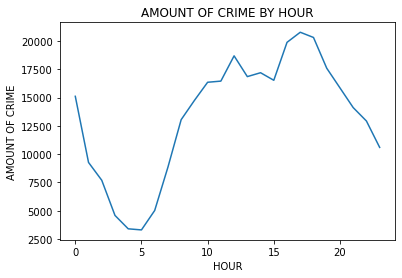

In [201]:
sns.lineplot(data=crime_date)
plt.title('AMOUNT OF CRIME BY HOUR')
plt.ylabel('AMOUNT OF CRIME')

Text(0, 0.5, 'AMOUNT OF CRIME')

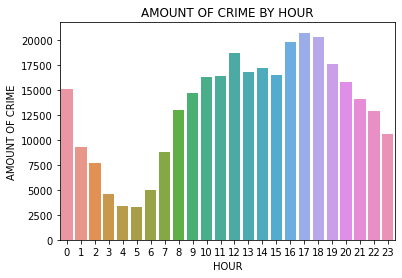

In [208]:
sns.barplot(data=crime_date, x=crime_date.index, y='NUMBER OF CRIMES')
plt.title('AMOUNT OF CRIME BY HOUR')
plt.ylabel('AMOUNT OF CRIME')

<AxesSubplot:xlabel='HOUR'>

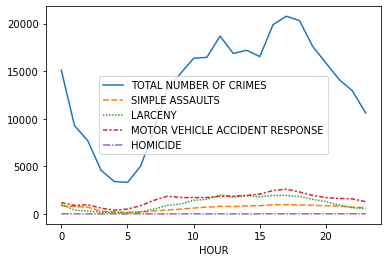

In [219]:
crime_date['SIMPLE ASSAULTS'] = crimes.loc[crimes.OFFENSE_CODE_GROUP == 'Simple Assault'].groupby('HOUR').HOUR.count()
crime_date['LARCENY'] = crimes.loc[crimes.OFFENSE_CODE_GROUP == 'Larceny'].groupby('HOUR').HOUR.count()
crime_date['MOTOR VEHICLE ACCIDENT RESPONSE'] = crimes.loc[crimes.OFFENSE_CODE_GROUP == 'Motor Vehicle Accident Response'].groupby('HOUR').HOUR.count()
crime_date['HOMICIDE'] = crimes.loc[crimes.OFFENSE_CODE_GROUP == 'Homicide'].groupby('HOUR').HOUR.count()
sns.lineplot(data=crime_date)

https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

<AxesSubplot:xlabel='HOUR'>

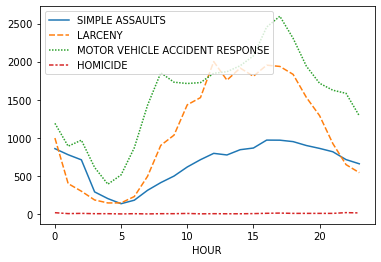

In [221]:
crime_date_no_total = crime_date.drop('TOTAL NUMBER OF CRIMES', axis=1)
sns.lineplot(data=crime_date_no_total)

#### Where does most crime in Boston take place?

https://datascientyst.com/plot-latitude-longitude-pandas-dataframe-python/, https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

https://anaconda.org/conda-forge/geopandas, https://data.boston.gov/dataset/city-of-boston-boundary

In [225]:
boston_map = gpd.fileread()